In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
car_df = pd.read_excel('/Users/shrut/Downloads/car_purchasing.xlsx')
print(car_df)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0 

In [120]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [121]:
car_df.isna().sum().any()

False

In [122]:
# Find duplicate rows
duplicate_rows = car_df[car_df.duplicated()]

print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [customer name, customer e-mail, country, gender, age, annual Salary, credit card debt, net worth, car purchase amount]
Index: []


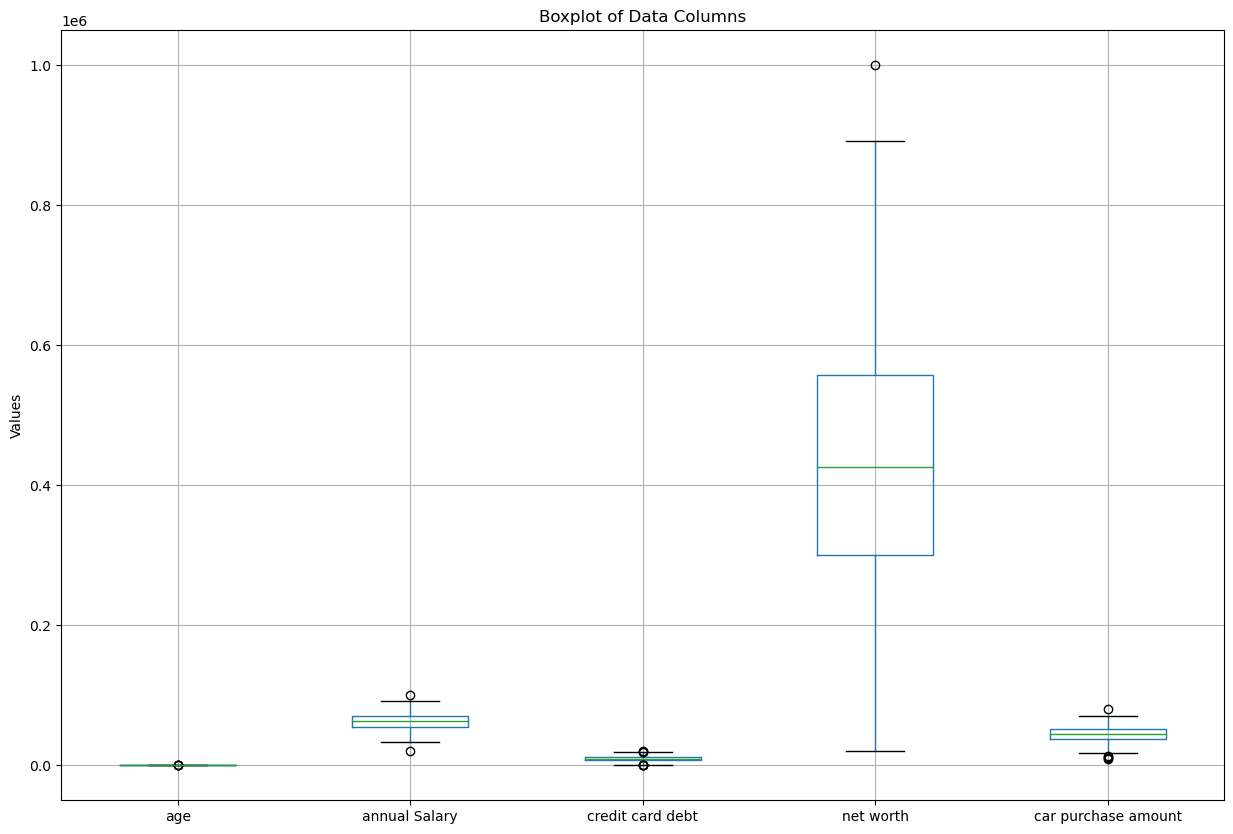

In [123]:
# Increase the size of the plot
plot.figure(figsize=(15, 10))
# Boxplot
car_df.boxplot(column=["age", "annual Salary", "credit card debt", "net worth", "car purchase amount"])

# Set plot labels
plot.title("Boxplot of Data Columns")
plot.ylabel("Values")

# Show the plot
plot.show()

In [124]:
# Function to remove outliers using IQR
def remove_outliers(car_df, column):
    Q1 = car_df[column].quantile(0.25)
    Q3 = car_df[column].quantile(0.75)
    IQR = Q3 - Q1
    return car_df[(car_df[column] >= Q1 - 1.5 * IQR) & (car_df[column] <= Q3 + 1.5 * IQR)]

# Specify columns for which you want to remove outliers
columns_to_remove_outliers = ["age", "annual Salary", "credit card debt", "net worth", "car purchase amount"]

# Remove outliers for each specified column
for column in columns_to_remove_outliers:
    car_df = remove_outliers(car_df, column)

# Display the DataFrame without outliers
print(car_df)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0 

C:\Users\shrut\AppData\Local\Temp\ipykernel_40804\2070734537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_df.corr()


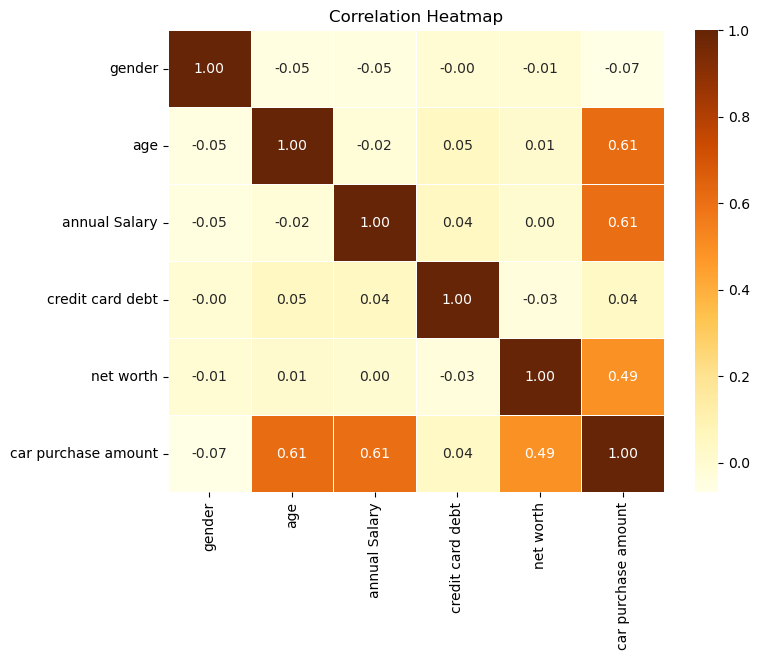

In [125]:

# Calculate the correlation matrix
correlation_matrix = car_df.corr()

# Create a heatmap using Seaborn
plot.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)

# Set plot labels and title
plot.title("Correlation Heatmap")
plot.show()

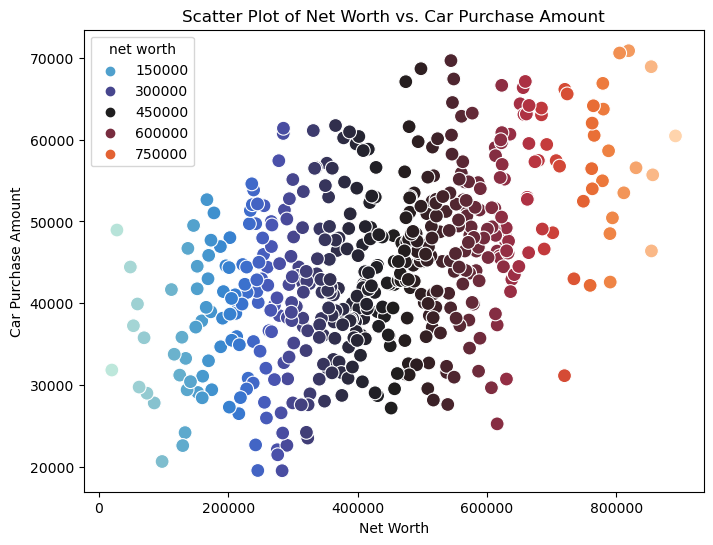

In [126]:
# Create a scatter plot
plot.figure(figsize=(8, 6))
sns.scatterplot(data=car_df, x="net worth", y="car purchase amount", hue="net worth", palette="icefire", s=100)

# Set plot labels and title
plot.title("Scatter Plot of Net Worth vs. Car Purchase Amount")
plot.xlabel("Net Worth")
plot.ylabel("Car Purchase Amount")

# Show the plot
plot.show()

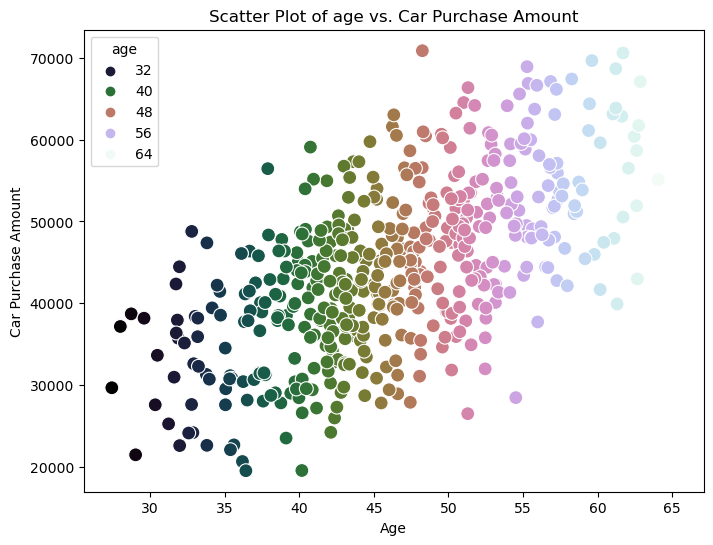

In [127]:
# Create a scatter plot
plot.figure(figsize=(8, 6))
sns.scatterplot(data=car_df, x="age", y="car purchase amount", hue="age", palette="cubehelix", s=100)

# Set plot labels and title
plot.title("Scatter Plot of age vs. Car Purchase Amount")
plot.xlabel("Age")
plot.ylabel("Car Purchase Amount")

# Show the plot
plot.show()

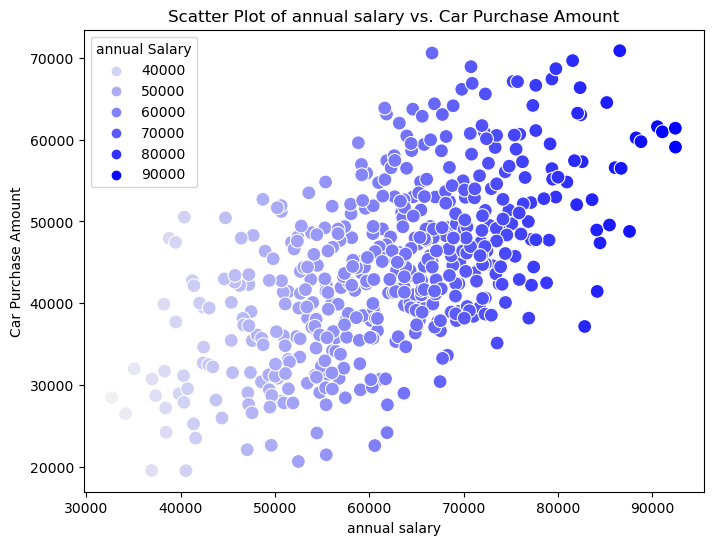

In [128]:
# Create a scatter plot
plot.figure(figsize=(8, 6))
sns.scatterplot(data=car_df, x="annual Salary", y="car purchase amount", hue="annual Salary", palette="light:b", s=100)

# Set plot labels and title
plot.title("Scatter Plot of annual salary vs. Car Purchase Amount")
plot.xlabel("annual salary")
plot.ylabel("Car Purchase Amount")

# Show the plot
plot.show()

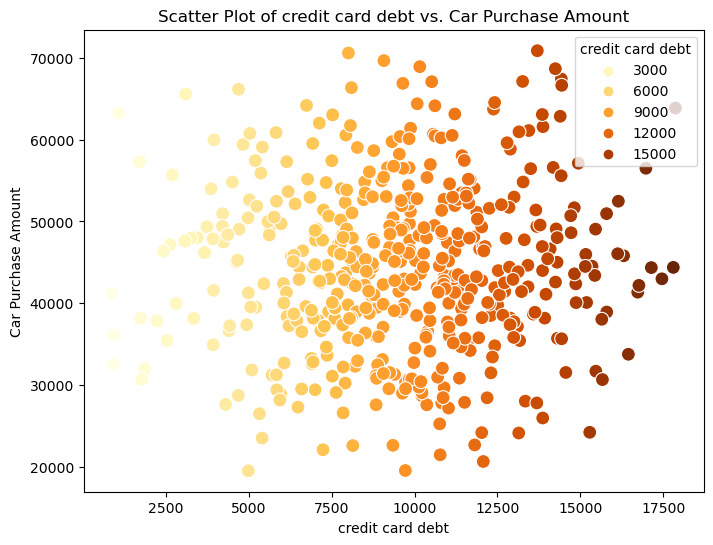

In [129]:
# Create a scatter plot
plot.figure(figsize=(8, 6))
sns.scatterplot(data=car_df, x="credit card debt", y="car purchase amount", hue="credit card debt", palette="YlOrBr", s=100)

# Set plot labels and title
plot.title("Scatter Plot of credit card debt vs. Car Purchase Amount")
plot.xlabel("credit card debt")
plot.ylabel("Car Purchase Amount")

# Show the plot
plot.show()

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features= [ 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
car_df[numerical_features]=scaler.fit_transform(car_df[numerical_features])
print(car_df)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender       age  annual Salary  credit card debt  \
0        Bulgaria       0 -

In [131]:
all_predictors = [ 'age', 'annual Salary', 'credit card debt', 'net worth']
outcome = 'car purchase amount'
# partition data
X = pd.get_dummies(car_df[all_predictors], drop_first=True)
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=1)


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from dmba import backward_elimination, forward_selection, stepwise_selection

# Assuming you have a dataset or DataFrame with features (train_X) and target variable (train_y)

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    predictions = model.predict(train_X[variables])
    mse = mean_squared_error(train_y, predictions)
    return mse

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)

Variables: age, annual Salary, credit card debt, net worth
Start: score=0.00
Step: score=0.00, remove None
['age', 'annual Salary', 'credit card debt', 'net worth']


In [133]:
from dmba import adjusted_r2_score, AIC_score, BIC_score
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model,
verbose=True)
print(best_variables)

Variables: age, annual Salary, credit card debt, net worth
Start: score=832.35, constant
Step: score=702.03, add annual Salary
Step: score=447.41, add age
Step: score=-4275.62, add net worth
Step: score=-4275.62, add None
['annual Salary', 'age', 'net worth']


In [140]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your dataset (replace this with your actual dataset)
# car_df = pd.read_csv('your_dataset.csv')

# Features and target variable
X = car_df[["age", "annual Salary", "credit card debt", "net worth"]]
y = car_df["car purchase amount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scenario 1: Default hidden layer sizes (20, 60) and 1000 iterations
model_scenario_1 = MLPRegressor(hidden_layer_sizes=(30,60) , activation='relu', max_iter=1000, random_state=42)

# Train the model
model_scenario_1.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
predictions_scenario_1 = model_scenario_1.predict(X_test_scaled)
mse_scenario_1 = mean_squared_error(y_test, predictions_scenario_1)
r2_scenario_1 = r2_score(y_test, predictions_scenario_1)
print(f'Scenario 1 - Mean Squared Error: {mse_scenario_1}')
print(f'Scenario 1 - R2 Score: {r2_scenario_1}')



# Make predictions on new data for both scenarios
new_data = pd.DataFrame({
    "age": [41.8517198],
    "annual Salary": [62812.09301],
    "credit card debt": [11609.38091],
    "net worth": [238961.2505],
})

new_data_scaled = scaler.transform(new_data)

prediction_scenario_1 = model_scenario_1.predict(new_data_scaled)
print(f'Scenario 1 - Predicted Car Purchase Amount: {prediction_scenario_1[0]}')


Scenario 1 - Mean Squared Error: 0.005130297270692004
Scenario 1 - R2 Score: 0.993451842257522
Scenario 1 - Predicted Car Purchase Amount: 140090.99530677416


In [141]:
# Scenario 2: Different hidden layer sizes (e.g., (30, 50)) and 1500 iterations
model_scenario_2 = MLPRegressor(hidden_layer_sizes=(40, 80), activation='relu', max_iter=1500, random_state=42)

# Train the model
model_scenario_2.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
predictions_scenario_2 = model_scenario_2.predict(X_test_scaled)
mse_scenario_2 = mean_squared_error(y_test, predictions_scenario_2)
r2_scenario_2 = r2_score(y_test, predictions_scenario_2)
print(f'Scenario 2 - Mean Squared Error: {mse_scenario_2}')
print(f'Scenario 2 - R2 Score: {r2_scenario_2}')


# Make predictions on new data for both scenarios
new_data = pd.DataFrame({
    "age": [41.8517198],
    "annual Salary": [62812.09301],
    "credit card debt": [11609.38091],
    "net worth": [238961.2505],
})

prediction_scenario_2 = model_scenario_2.predict(new_data_scaled)
print(f'Scenario 2 - Predicted Car Purchase Amount: {prediction_scenario_2[0]}')

Scenario 2 - Mean Squared Error: 0.005880135078944373
Scenario 2 - R2 Score: 0.9924947717427663
Scenario 2 - Predicted Car Purchase Amount: 140304.60142019065


In [145]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train_scaled, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso_model.fit(X_train_scaled, y_train)

# Evaluate Ridge model on the test set
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Mean Squared Error on Test Set: {ridge_mse}')

# Evaluate Lasso model on the test set
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Mean Squared Error on Test Set: {lasso_mse}')

Ridge Mean Squared Error on Test Set: 5.308863969180868e-06
Lasso Mean Squared Error on Test Set: 0.78430472283443


In [146]:
# Build the Multiple Linear Regression model
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
predictions = mlr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse}')

# Make predictions on new data
new_data = pd.DataFrame({
    "age": [41.8517198],
    "annual Salary": [62812.09301],
    "credit card debt": [11609.38091],
    "net worth": [238961.2505],
})

new_data_scaled = scaler.transform(new_data)
prediction = mlr_model.predict(new_data_scaled)
print(f'Predicted Car Purchase Amount: {prediction[0]}')

Mean Squared Error on Test Set: 2.1901514511648042e-08
Predicted Car Purchase Amount: 155546.61373522345
